In [4]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
import tensorflow as tf; tf.config.set_visible_devices([], 'GPU')

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255.0

model = Sequential(name="First_CNN")

model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(train_images, train_labels, epochs=5)

Model: "First_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)               0 

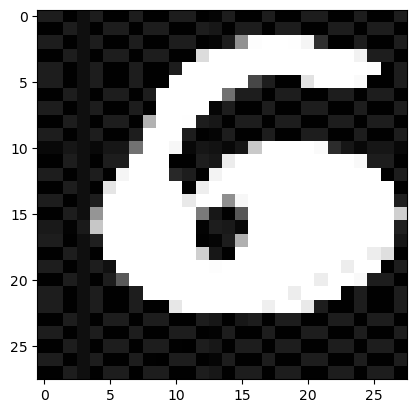

In [5]:
import matplotlib.pyplot as plt
import cv2 as cv
image = cv.imread('test.png', cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28, 28))
image = image.astype('float32')
image = image.reshape(1, 784)

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()

In [6]:
pred = model.predict(image.reshape(1,28,28,1), batch_size=1)
print(f'predicted number=, {pred.argmax()}')

1/1 [==============================] - 0s 21ms/step
predicted number=, 5
